# First and most basic model

The most basic ML model is a decision tree. It is key to understand the data before jumping into predictions.

For a decision tree we need to know what we are trying to predict (y variable) - Price and compare it to a dependent variable.

## Imports and Configurations 

In [58]:
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

## Load Data and Initialize Data

In [59]:
dfmlb = pd.read_csv('./house_prices.csv')

## Select Data

In [60]:
# Select a prediction "Target"
y = dfmlb[['Price']]

# Choose "Features"
x = dfmlb[['Rooms', 'Bathroom', 'Landsize', 'Latitude', 'Longitude']]

x.head()
x.describe()

,Rooms,Bathroom,Landsize,Latitude,Longitude
0,2,1.0,202.0,-37.7996,144.9984
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
3,3,2.0,94.0,-37.7969,144.9969
4,4,1.0,120.0,-37.8072,144.9941


,Rooms,Bathroom,Landsize,Latitude,Longitude
count,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.534242,558.416127,-37.809203,144.995216
std,0.955748,0.691712,3990.669241,0.079260,0.103916
min,1.000000,0.000000,0.000000,-38.182550,144.431810
25%,2.000000,1.000000,177.000000,-37.856822,144.929600
50%,3.000000,1.000000,440.000000,-37.802355,145.000100
75%,3.000000,2.000000,651.000000,-37.756400,145.058305
max,10.000000,8.000000,433014.000000,-37.408530,145.526350


## Build Model

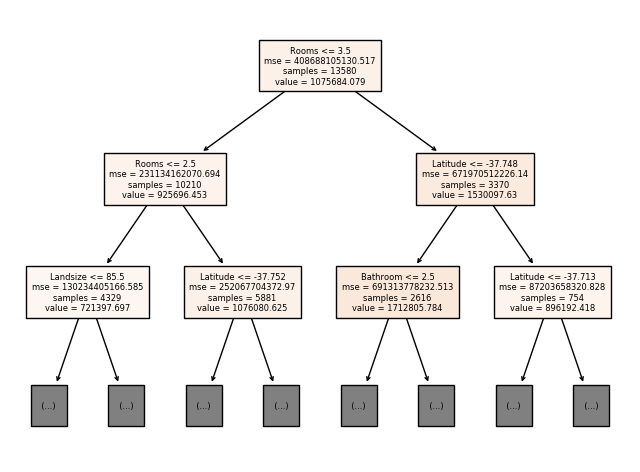

In [61]:
from sklearn.tree import DecisionTreeRegressor

# 1. Define
mdlDtrMlb = DecisionTreeRegressor()


# 2. Fit
_ = mdlDtrMlb.fit(x, y)

# Visualization View tree

from sklearn.tree import plot_tree
_ = plt.figure(figsize=(8,6), dpi=100)
_ = plot_tree(mdlDtrMlb, max_depth=2, feature_names=x.columns, fontsize=6, filled=True)
plt.show()

In [62]:
# 3. Predict
mdlDtrMlb.predict(x.head())


array([1480000., 1035000., 1465000.,  850000., 1600000.])

In [63]:
y.head()

,Price
0,1480000.0
1,1035000.0
2,1465000.0
3,850000.0
4,1600000.0


In [64]:
y_pred = mdlDtrMlb.predict(x)
y_pred

array([1480000., 1035000., 1465000., ..., 1170000., 2500000., 1285000.])

In [65]:
# 4. Evaluate

from sklearn.metrics import mean_absolute_error
print('MAE: ', mean_absolute_error(y, y_pred))

MAE:  1125.1804614629357


In [66]:
y.mean()

Price    1.075684e+06
dtype: float64

In [67]:
## Split data into train and test to avoid overfitting

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Define model 
mdlDtrMlbSplt = DecisionTreeRegressor(random_state=1)

# Fit 
_ = mdlDtrMlbSplt.fit(x_train, y_train)

# Predict
y_test_pred = mdlDtrMlbSplt.predict(x_test)

# Evaluate test data actual vs predict
print('MAE (after train-test-split): ', mean_absolute_error(y_test,y_test_pred))

MAE (after train-test-split):  238406.56130338734
